In [16]:
pip install beautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [64]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [70]:
# 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [72]:
df_filtered = df[df['Open'] != 0.0].reset_index(drop=True)
open_data = df_filtered[['Open']].values  # numpy로 변환

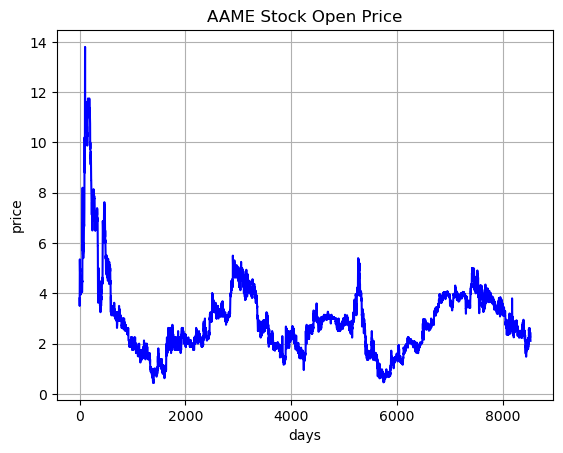

In [74]:
# 3. 시각화
plt.plot(open_data, color='blue')
plt.title("AAME Stock Open Price")
plt.xlabel("days")
plt.ylabel("price")
plt.grid(True)
plt.show()

In [76]:
# 4. 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(open_data)

In [78]:
# 5. 시퀀스 생성 함수
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data) - window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

In [80]:
# 6. 윈도우 크기 7로 시퀀스 생성
window_size = 7
X, y = make_sample(scaled_data, window_size)

In [82]:
# 7. 훈련/테스트 분리 (80:20)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [92]:
from tensorflow.keras.layers import Input

# 8. RNN 모델 정의
model = Sequential()
model.add(Input(shape=(7, 1)))  # 명시적 입력 레이어
model.add(SimpleRNN(16, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
# 9. 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# 10. 예측
pred = model.predict(X_test)

Epoch 1/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0010
Epoch 2/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8309e-04
Epoch 3/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4815e-04
Epoch 4/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.5917e-04
Epoch 5/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4862e-04
Epoch 6/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.7271e-04
Epoch 7/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.3650e-04
Epoch 8/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2540e-04
Epoch 9/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2967e-04
Epoch 10/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3317e-04
Epoch 11/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3689e-04
Epoch 12/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.4351e-04
Epoch 13/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3895e-04
Epoch 14/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.

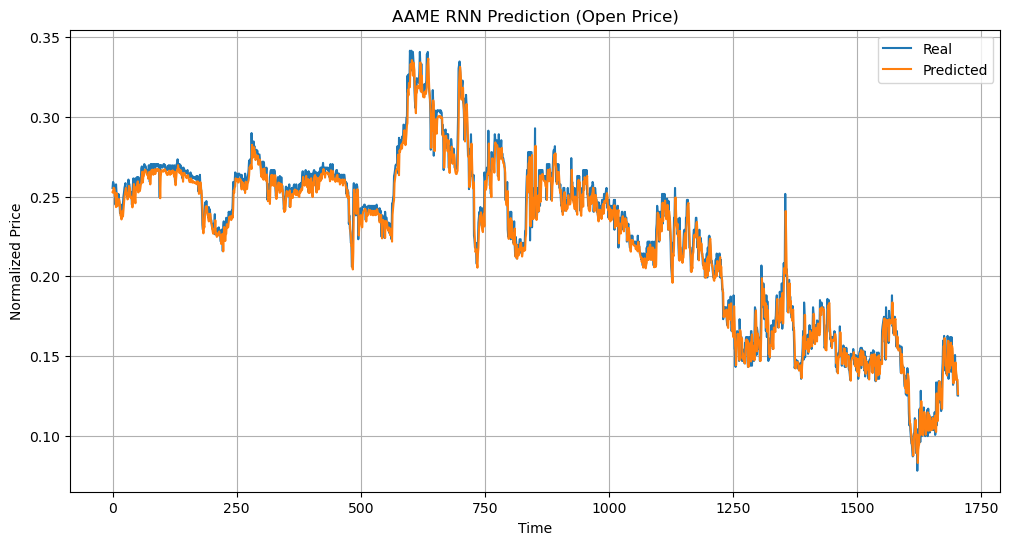

In [87]:
# 11. 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Real')
plt.plot(pred, label='Predicted')
plt.title("AAME RNN Prediction (Open Price)")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()